In [3]:
import numpy as np
import tensorflow as tf
#import matplotlib as plt
import pandas as pd


/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [17]:
df = pd.read_csv("sonar_csv.csv")
print(len(df.columns))
X = df[df.columns[0:60]].values
y = df[df.columns[60]]

61


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [18]:
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels = len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels,n_unique_labels))
  one_hot_encode[np.arange(n_labels), labels] = 1
  return one_hot_encode

In [19]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

In [20]:
import random
from random import shuffle
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import matplotlib.pyplot as plt



In [21]:
#X,Y = random.shuffle(X,Y,random_state=1)
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.20, random_state=42)

In [22]:
learning_rate = 0.1
training_epochs = 1000
 
cost_history = np.empty(shape=[1],dtype=float)
 
n_dim = X.shape[1]
n_class = 2
 
x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))


Instructions for updating:
Colocations handled automatically by placer.


In [28]:
y_ = tf.placeholder(tf.float32,[None,n_class])
y = tf.nn.softmax(tf.matmul(x, W)+ b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)),reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [30]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)



In [43]:
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost = sess.run(cost_function,feed_dict={x: train_x,y_: train_y})
    cost_history = np.append(cost_history,cost)
    print('epoch : ', epoch,  ' - ', 'cost: ', cost)

epoch :  0  -  cost:  0.43933064
epoch :  1  -  cost:  0.43928137
epoch :  2  -  cost:  0.43923205
epoch :  3  -  cost:  0.43918285
epoch :  4  -  cost:  0.43913373
epoch :  5  -  cost:  0.43908456
epoch :  6  -  cost:  0.43903556
epoch :  7  -  cost:  0.4389867
epoch :  8  -  cost:  0.43893778
epoch :  9  -  cost:  0.4388889
epoch :  10  -  cost:  0.43884015
epoch :  11  -  cost:  0.43879142
epoch :  12  -  cost:  0.43874273
epoch :  13  -  cost:  0.43869415
epoch :  14  -  cost:  0.4386456
epoch :  15  -  cost:  0.43859702
epoch :  16  -  cost:  0.43854868
epoch :  17  -  cost:  0.4385003
epoch :  18  -  cost:  0.43845198
epoch :  19  -  cost:  0.43840373
epoch :  20  -  cost:  0.4383555
epoch :  21  -  cost:  0.4383073
epoch :  22  -  cost:  0.4382592
epoch :  23  -  cost:  0.4382112
epoch :  24  -  cost:  0.43816316
epoch :  25  -  cost:  0.43811527
epoch :  26  -  cost:  0.43806738
epoch :  27  -  cost:  0.43801957
epoch :  28  -  cost:  0.43797183
epoch :  29  -  cost:  0.4379241

In [45]:
pred_y = sess.run(y, feed_dict={x: test_x})
 
#calculate the correct predictions
correct_prediction = tf.equal(tf.argmax(pred_y,1), tf.argmax(test_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
Accuracy=sess.run(accuracy)
print(Accuracy)
#print(&amp;amp;amp;quot;Accuracy: &amp;amp;amp;quot;,sess.run(accuracy))

0.8333333


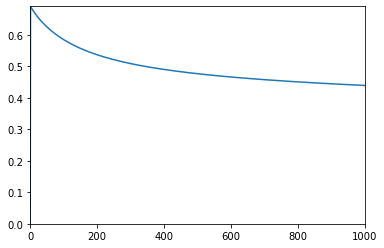

In [46]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()